In [1]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import folium
import json

In [2]:
path = r'C:\Users\New\Desktop\cardata'

In [3]:
df = pd.read_excel(os.path.join(r'C:\Users\New\Desktop\Carsnew\02 Data\Original Data\USA_cars_datasets.xlsx'))

In [4]:
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


In [6]:
df.columns

Index(['Unnamed: 0', 'price', 'brand', 'model', 'year', 'title_status',
       'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')

In [7]:
df.isnull().sum()

Unnamed: 0      0
price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64

In [8]:
df.describe()

,Unnamed: 0,price,year,mileage,lot
count,2499.000000,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,1249.000000,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,721.543484,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,624.500000,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,1249.000000,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,1873.500000,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,2498.000000,84900.000000,2020.000000,1.017936e+06,1.678055e+08


In [9]:
df.drop(['Unnamed: 0','vin','lot'],axis=1,inplace=True)

In [10]:
df.describe()

,price,year,mileage
count,2499.000000,2499.000000,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04
std,12116.094936,3.442656,5.970552e+04
min,0.000000,1973.000000,0.000000e+00
25%,10200.000000,2016.000000,2.146650e+04
50%,16900.000000,2018.000000,3.536500e+04
75%,25555.500000,2019.000000,6.347250e+04
max,84900.000000,2020.000000,1.017936e+06


In [11]:
df.head()

,price,brand,model,year,title_status,mileage,color,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,usa,22 hours left


In [12]:
## Cleaning Data

In [13]:
df.isnull().sum()

price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
state           0
country         0
condition       0
dtype: int64

In [14]:
df_dups = df[df.duplicated()]

In [15]:
df_dups

,price,brand,model,year,title_status,mileage,color,state,country,condition


In [16]:
## Changing the condition from days to auction to Minutes left before auction.

In [17]:
df['value']= df['condition'] .str.split(' ').str[0]
df['days']= df['condition'] .str.split(' ').str[1]

def days_to_min_converter(time):
    return int(time)*1440

def hours_to_min_converter(time):
    return int(time)*60


temp_data=pd.concat([df[df['days']=='days']['value'].apply(days_to_min_converter),
           df[df['days']=='hours']['value'].apply(hours_to_min_converter),
           df[df['days']=='minutes']['value'].astype(int)]).rename('Minutes_Left',inplace=True)



df=pd.concat([df,temp_data],axis=1)
df['Minutes_Left'].fillna(-200,inplace=True)

df.drop(['condition','value','days'],axis=1,inplace=True)

In [18]:
##### Extreme values checks

C:\Users\New\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

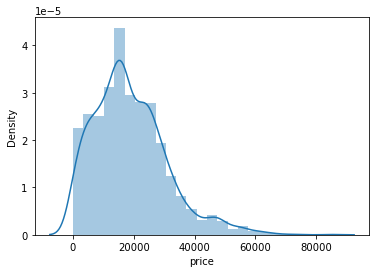

In [19]:
sns.distplot(df['price'], bins=25) # Shows extreme values

In [20]:
df.min()

C:\Users\New\AppData\Local\Temp\ipykernel_5788\3962516015.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.min()


price                       0
brand                   acura
year                     1973
title_status    clean vehicle
mileage                   0.0
color                   beige
state                 alabama
country                canada
Minutes_Left           -200.0
dtype: object

In [21]:
df.max()

C:\Users\New\AppData\Local\Temp\ipykernel_5788\1151452817.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.max()


price                       84900
brand                      toyota
year                         2020
title_status    salvage insurance
mileage                 1017936.0
color                      yellow
state                     wyoming
country                       usa
Minutes_Left              21600.0
dtype: object

In [22]:
## Checking distribution for price

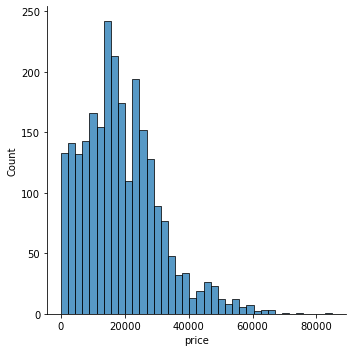

In [23]:
sns.displot(df['price'])

In [27]:
## Checking for top brands

Text(5, 622.5, 'Top 4 by count of the total: 91.08000000000001%')

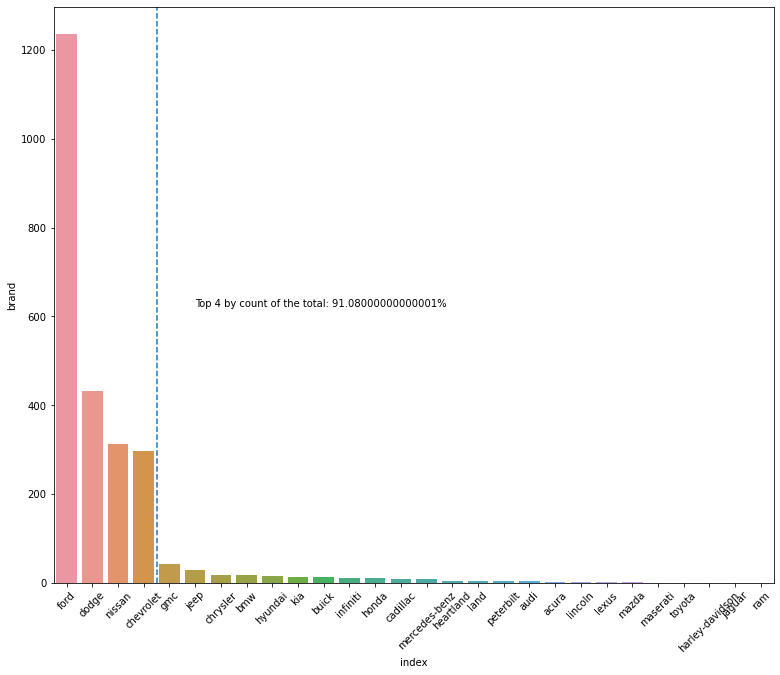

In [28]:
fig = plt.figure(figsize = (10, 8))
axes = fig.add_axes([0, 0, 1, 1])
brand_count = df['brand'].value_counts().reset_index()
sns.barplot(x = brand_count['index'], y = brand_count['brand'], )
plt.xticks(rotation = 45)

## count the top four 
cnt = 0
for i in range(4):
    cnt += brand_count['brand'][i]
all = brand_count['brand'].sum()
    
axes.axvline(x = 3.5, linestyle = "--", )
lint_text = "Top 4 by count of the total: %s"

percentage = str(round(cnt / all, 4) * 100 ) + "%"
axes.text(5, 622.5, (lint_text % percentage))

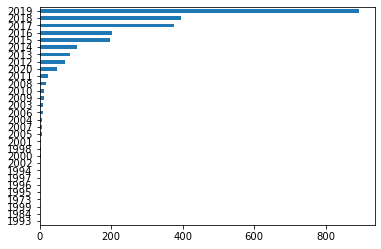

In [30]:
df['year'].value_counts().sort_values().plot(kind = 'barh');

In [32]:
sns.set_style('darkgrid')
plt.rcParams.update({'figure.figsize': (15,10)})
df.describe().T.style.set_properties(**{'background-color': 'grey','color': 'white','border-color': 'white'})

,count,mean,std,min,25%,50%,75%,max
price,2499.000000,18767.671469,12116.094936,0.000000,10200.000000,16900.000000,25555.500000,84900.000000
year,2499.000000,2016.714286,3.442656,1973.000000,2016.000000,2018.000000,2019.000000,2020.000000
mileage,2499.000000,52298.685474,59705.516356,0.000000,21466.500000,35365.000000,63472.500000,1017936.000000
Minutes_Left,2499.000000,3285.679872,3669.656911,-200.000000,1260.000000,2880.000000,2880.000000,21600.000000


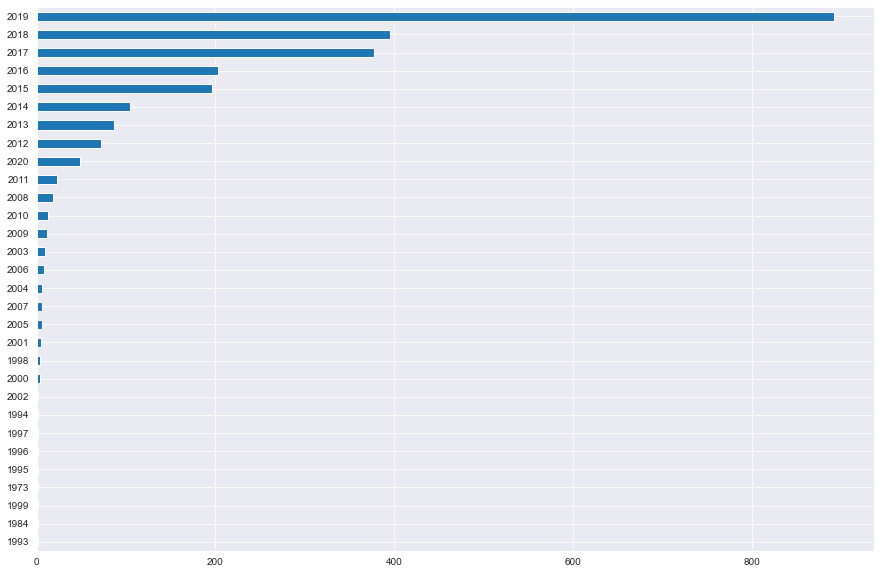

In [33]:
df['year'].value_counts().sort_values().plot(kind = 'barh');

<AxesSubplot:>

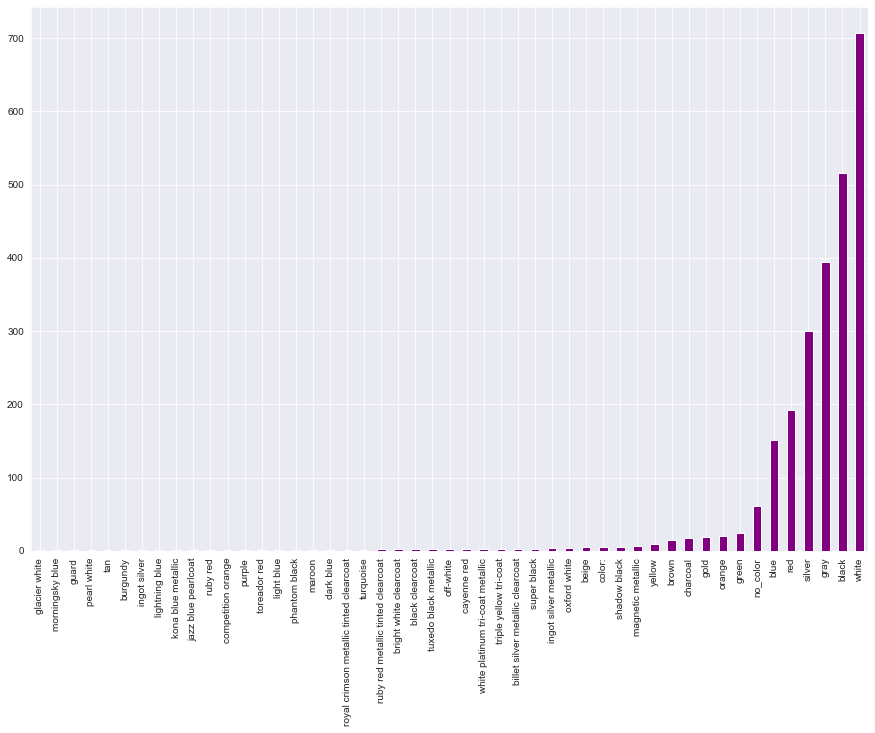

In [40]:
df['color'].value_counts().sort_values().plot(kind = 'bar', color= "purple")

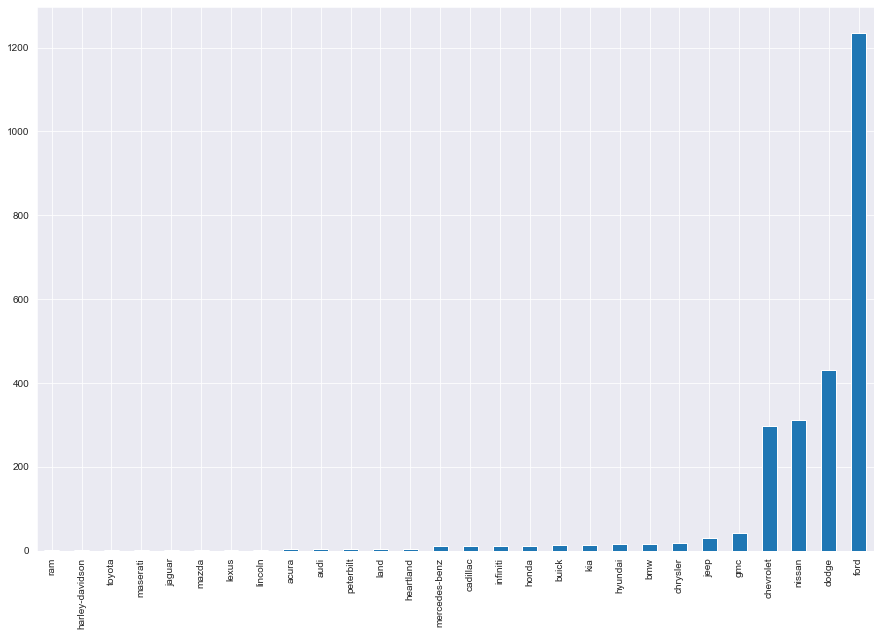

In [36]:
df['brand'].value_counts().sort_values().plot(kind = 'bar');

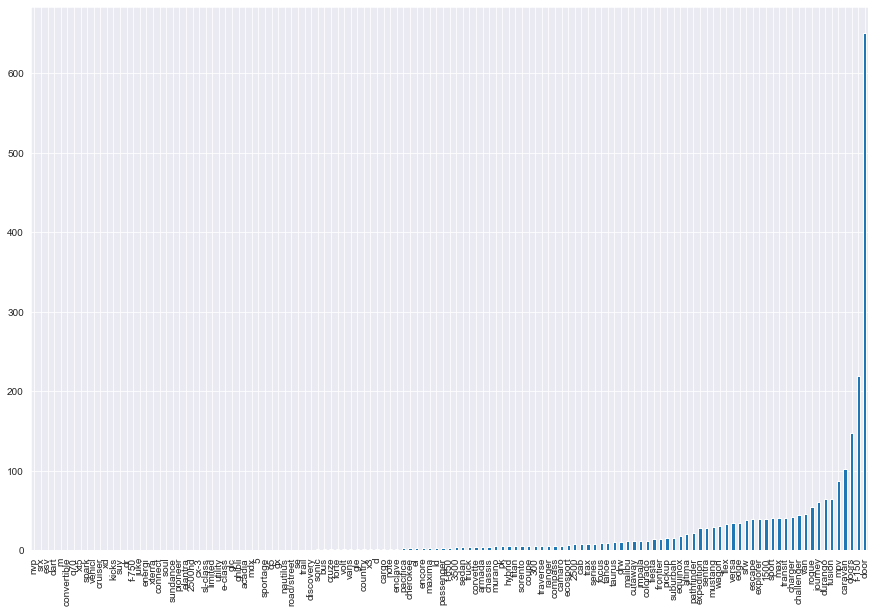

In [37]:
df['model'].value_counts().sort_values().plot(kind = 'bar');

<AxesSubplot:>

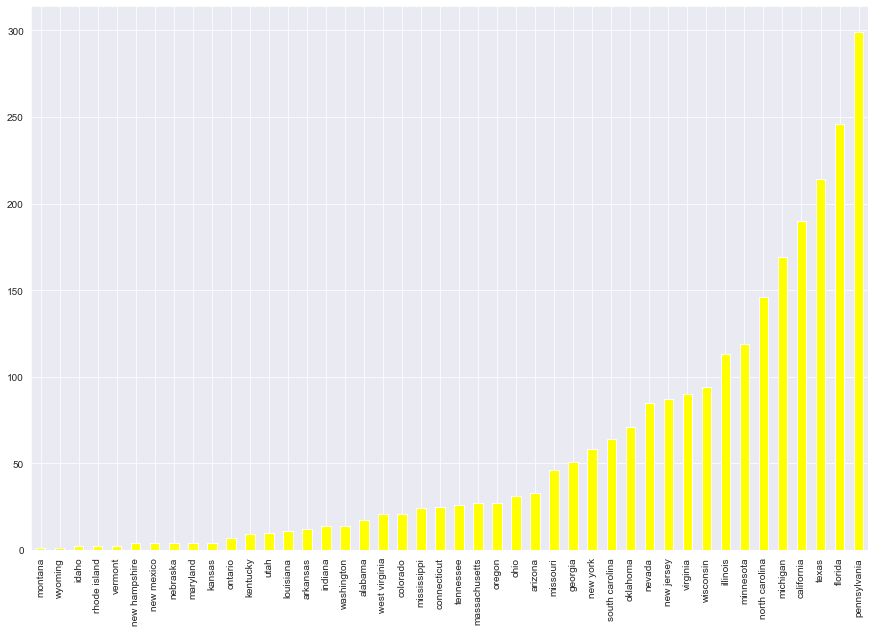

In [39]:
df['state'].value_counts().sort_values().plot(kind = 'bar', color= "yellow")

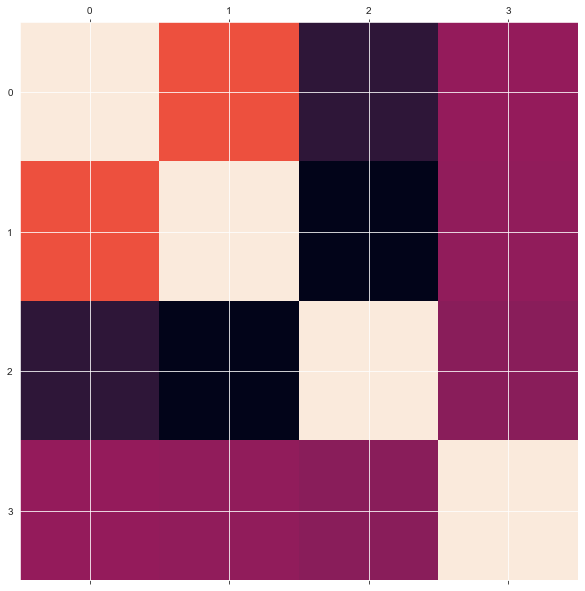

In [41]:
# Correlation heatmap

plt.matshow (df.corr())

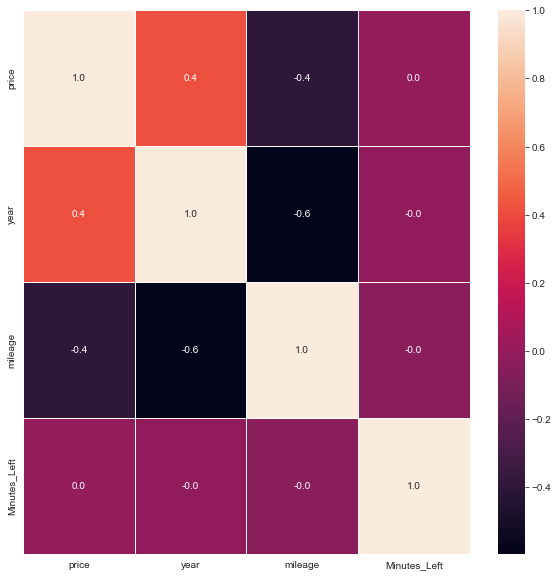

In [42]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [43]:
## Which brand has the highest price

In [44]:
df.sort_values("price")

,price,brand,model,year,title_status,mileage,color,state,country,Minutes_Left
410,0,chevrolet,door,1995,salvage insurance,274706.0,green,arizona,usa,2880.0
330,0,ford,door,1996,salvage insurance,296860.0,green,california,usa,1140.0
331,0,ford,door,2006,salvage insurance,203158.0,red,illinois,usa,1020.0
339,0,ford,door,2002,salvage insurance,214800.0,black,south carolina,usa,2880.0
496,0,ford,pickup,1996,salvage insurance,252588.0,red,oklahoma,usa,1020.0
...,...,...,...,...,...,...,...,...,...,...
1215,65500,ford,srw,2019,clean vehicle,6500.0,black,indiana,usa,1260.0
277,67000,dodge,challenger,2019,clean vehicle,10944.0,blue,ohio,usa,1260.0
1336,70000,ford,drw,2019,clean vehicle,9643.0,no_color,illinois,usa,2880.0
1340,74000,ford,drw,2019,clean vehicle,10536.0,no_color,illinois,usa,2880.0


In [45]:
## which brand has the lowest in terms of mileage

In [46]:
df[df['mileage'] == df['mileage'].min()]['model'].unique()

array(['door', 'chassis', 'truck'], dtype=object)

In [47]:
##Which car is the best selling brand in Virginia?

In [48]:
df[df['state'] == 'virginia'].value_counts('brand').idxmax()

'ford'

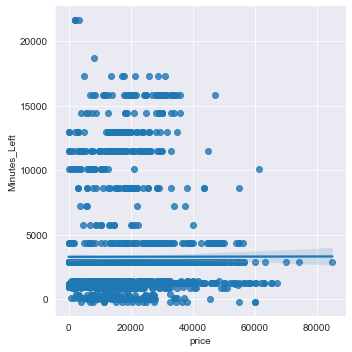

In [51]:
sns.lmplot(x = 'price', y = 'Minutes_Left', data = df)

In [54]:
sub = df[['year', 'price', 'brand', 'model','color', 'state', 'mileage', 'title_status']]

In [55]:
sub_2 = sub[['year', 'price', 'brand', 'model','color', 'state', 'mileage', 'title_status']]

In [56]:
# Create a pair plot

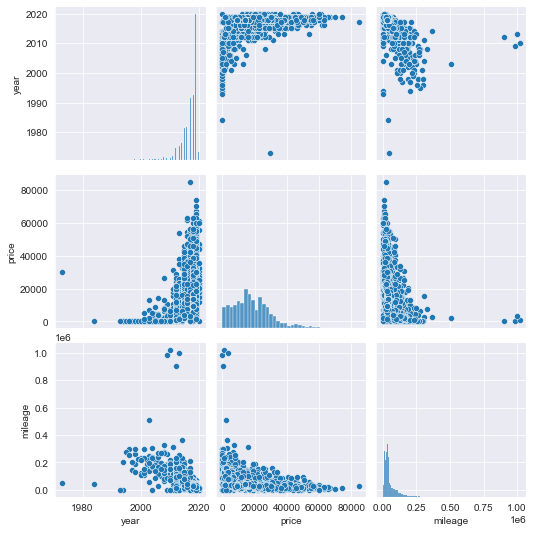

In [57]:
g = sns.pairplot(sub_2)

In [58]:
## Building a model and evaluate

In [59]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']

In [60]:
X=df.drop('price',axis=1)
y=df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

train_set=pd.concat([X_train,y_train],axis=1)
test_set=pd.concat([X_test,y_test],axis=1)

NameError: name 'train_test_split' is not defined

In [61]:
## Importing additional libraries for testing

from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [62]:
X=df.drop('price',axis=1)
y=df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

train_set=pd.concat([X_train,y_train],axis=1)
test_set=pd.concat([X_test,y_test],axis=1)

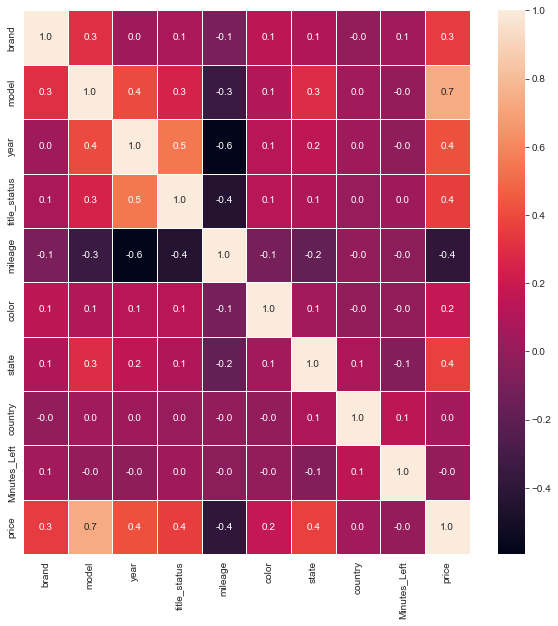

In [63]:
for feature in categorical_features:
    feature_labels=train_set.groupby(feature)['price'].mean().sort_values().index
    feature_labels={k:i for i,k in enumerate(feature_labels,0)}
    train_set[feature]=train_set[feature].map(feature_labels)
    test_set[feature]=test_set[feature].map(feature_labels)

test_set.dropna(inplace=True)

scaler=StandardScaler()

scaled_X_train=pd.DataFrame(scaler.fit_transform(train_set.drop('price',axis=1)), columns=X_train.columns)
scaled_X_train.index=train_set.index
scaled_X_test=pd.DataFrame(scaler.transform(test_set.drop('price',axis=1)), columns=X_test.columns)
scaled_X_test.index=test_set.index
scaled_train=pd.concat([scaled_X_train,train_set['price']],axis=1)
scaled_test=pd.concat([scaled_X_test,test_set['price']],axis=1)
X_train=scaled_train.drop('price',axis=1) 
y_train=scaled_train['price']
X_test=scaled_test.drop('price',axis=1)
y_test=scaled_test['price']

f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(scaled_train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [64]:
def try_model(model):
    model.fit(X_train, y_train)
 
    y_pred = model.predict(X_test)
    pd.DataFrame(y_pred)
    return 'Model Testing Accurancy: ', r2_score(y_test, y_pred)

In [65]:
neigh = KNeighborsRegressor(n_neighbors=6)
try_model(neigh)

('Model Testing Accurancy: ', 0.6945991238808297)

In [66]:
df

,price,brand,model,year,title_status,mileage,color,state,country,Minutes_Left
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa,14400.0
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa,8640.0
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,usa,2880.0
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,usa,1320.0
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,usa,1320.0
...,...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,california,usa,1440.0
2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,florida,usa,1260.0
2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,florida,usa,1260.0
2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,florida,usa,2880.0


In [67]:
## Exporting cleanned data to Prepared folder

In [68]:
df.to_csv(os.path.join(path, '02 Data','Prepared Data','Us Car sales clean.csv'))

In [69]:
path = r'C:\Users\New\Desktop\Carsnew'

In [70]:
df.to_csv(os.path.join(path, '02 Data','Prepared Data','Us Car sales clean.csv'))

In [71]:
df.to_excel(os.path.join(path, '02 Data','Prepared Data','Us Car sales clean.xlsx'))